# Import pre-calculated scattering density to a `FourierSliceProjector`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mosaics.reference_template.projector import FourierSliceProjector

## Pre-calculated 3D scattering potential .mrc file for taking Fourier slices

Numerous cryo-EM programs exist for generating 3-dimensional volumes from a reference structure.
We include the functionality to generate a projector object from these 3-dimensional volumes which implements the Fourier slice algorithm.
The `FourierSliceProjector` object can be instantiated from a pre-existing numpy array, but we also include the functionality to directly parse a `.mrc` file.

In [2]:
mrc_path = "/Users/mgiammar/Documents/MOSAICS/data/lsu_b_0.5.mrc"  # TODO: Remote path for large files

fs_projector = FourierSliceProjector.from_mrc(mrc_path)

## Taking Fourier slices and generating real-space projections

The `FourierSliceProjector` object can rapidly generate Fourier slices (and projections) from the reference structure by pre-calculating the FFT of the density array.
The two methods, `take_fourier_slice` and `get_real_space_projection` return the Fourier slice and real space projection at a given orientation, respectfully.

In [3]:
phi = np.deg2rad(0)
theta = np.deg2rad(0)
psi = np.deg2rad(0)

fourier_slice = fs_projector.take_fourier_slice(phi, theta, psi)
projection = fs_projector.get_real_space_projection(phi, theta, psi)

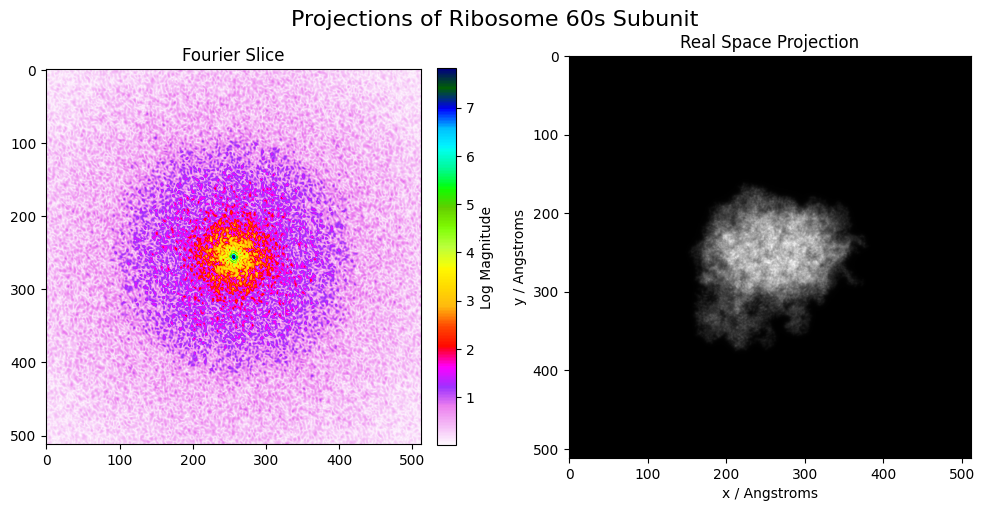

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

im0 = ax[0].imshow(np.log(np.abs(fourier_slice) + 1), cmap="gist_ncar_r")
cbar = fig.colorbar(im0, ax=ax[0], fraction=0.046, pad=0.04)
cbar.set_label("Log Magnitude")

ax[1].imshow(np.abs(projection), cmap="gray")

ax[0].set_title("Fourier Slice")
ax[1].set_title("Real Space Projection")

ax[1].set_xlabel("x / Angstroms")
ax[1].set_ylabel("y / Angstroms")

fig.suptitle("Projections of Ribosome 60s Subunit", fontsize=16)
plt.tight_layout()
plt.show()